# 3. Atlases and active shapes

## 3.1. Atlas-based segmentation

For this question we will use the ground-truth segmentations of different subjects as different atlases to do brain/not brain segmentation. Load the labels for subjects 1 to 5 as `labels1` to `labels5` with `create_labels`, which is almost the same as `create_dataset` but here we do not need the features. Subjects 1 to 4 will be training data and subject 5 will be test data. For the exercise we will assume the images are registered to each other, but in practice, you would have to perform registration first. Let's combine the labels and view how the true mask compares to the predicted mask:

```python
# Combine labels of training images:
predicted_labels = stats.mode(all_labels_matrix[:,:4], axis=1)[0]

# Convert combined label into mask image:
predicted_mask = predicted_labels.reshape(240,240)

# Convert true label into mask image:
true_mask = all_labels_matrix[:,4].reshape(240,240)

# View both masks on the same axis using imshow()
```

This functionality has also been implemented for you in the function `segmentation_combined_atlas()` in `# SECTION 3` of the `segmentation.py` module, look at the documentation to familiarize yourself with the syntax (i.e. what inputs and outputs are there). 

### EXERCISE:

Complete the function `segmentation_combined_atlas_test()` using the code above, and test the functionality of atlas-based segmentation. Calculate the error and the Dice overlap of your predicted mask and add them to the plot. Your result might look like this:

<img src="../notebooks/assets/atlas.png" width="500" height="500" align="center"/>


MSE 0.02875 Dice 0.9560416224251433


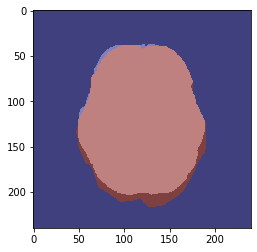

In [2]:
%matplotlib inline
import sys
sys.path.append("../code")
from segmentation_tests import segmentation_combined_atlas_test

segmentation_combined_atlas_test()


### (A)
### QUESTION:
Use `segmentation_combined_atlas()` to segment other subjects. Are the results similar for all subjects, or are some subjects better than others? Why?

### (B)
### EXERCISE:
Inspect the documentation of `min` and `max`. Add two `elseif` statements in the code (between `if` and `else`, for combining the labels with these functions. Test your additions with the function `segmentation_combined_atlas_minmax_test()` in `# SECTION 3` of the `segmentation_tests.py` module.

In [3]:
%matplotlib inline
import sys
sys.path.append("../code")
from segmentation_tests import segmentation_combined_atlas_minmax_test
segmentation_combined_atlas_minmax_test()

Combining method = min:
Error:
0.046857638888888886
Dice coefficient:
0.9245224978327135
Combining method = max:
Error:
0.040989583333333336
Dice coefficient:
0.9421592885665989


### QUESTION:
How can you describe what these options are doing in terms of how many atlases predict each class? What can you say about the size of the predicted segmentation, relative to the size of the true segmentation for each of these options?

### (C)
### EXERCISE:
Note that the code for options you described above will only work for binary labels! As an example to demonstrate this, try combining the labels `[0, 1, 2, 3]`, `[0, 1, 3, 1]` and `[3, 3, 1, 0]` by hand. (Here the numbers 0, 1, 2, 3 correspond to four different classes, for example tissue types).

## 3.2. Combining $k$-NN classifiers

In this question we combine $k$-NN classifiers trained on different subjects. This functionality is also already implemented for you in the function `segmentation_combined_knn()` in `# SECTION 3` of the `segmentation.py` module,

### (A)
### QUESTION:
What would you expect from the results of this combined method, compared to training $k$-NN on only one subject? Test your hypothesis on one of the subjects. (You can use `segmentation_knn()` to do this, note that this function has an extra input, since you need to specify which training subject you want to use!)

### (B)
### QUESTION:
What could you do if you wanted to combine more than four classifiers (giving different decisions) here, but you could only use a 5-NN classifier? 

## 3.3. Active shape models

### (A)
### EXERCISE:
Load `coordinates.txt` which contains coordinates of 40 hand shapes, each represented by 56 points. Dimensions 1 to 56 store the $x$-coordinate and dimensions 57 to 112 store the $y$-coordinate. Plot a few shapes to examine the variation. What do you think the mean shape will look like? Compute it to verify your guess.

In [5]:
%matplotlib inline
import sys
sys.path.append("../code")
import matplotlib.pyplot as plt
import numpy as np
import segmentation_util as util
from scipy import stats
import scipy.io


fn = '../data/dataset_hands/coordinates.txt'
coordinates =  np.loadtxt(fn)



### (B)
### EXERCISE:
Apply `mypca` on the coordinates data. How many dimensions are needed to describe 98% of the variance? Store only the vectors corresponding to these dimensions in `U`.

In [6]:
%matplotlib inline
import sys
sys.path.append("../code")
import segmentation as seg
import numpy as np

fn = '../data/dataset_hands/coordinates.txt'
coordinates =  np.loadtxt(fn)

### (C)
### EXERCISE:
Create a loop to go through the dimensions left in `U` and compute a variation that this dimension produces. For the weight, you might want to use the corresponding eigenvalue multiplied by a small scaling factor, like 5. What are the main variation that you notice?

### (D)
### EXERCISE:
Load the image `test001.jpg` and view it in grayscale. If you were to plot the hand template on top of this image, what do you expect to happen? Verify your hypothesis.

In [7]:
%matplotlib inline
import sys
sys.path.append("../code")
import matplotlib.pyplot as plt
import numpy as np
import segmentation_util as util
from scipy import stats
import scipy.io
from segmentation import generate_gaussian_data 

fn = '../data/dataset_hands/test001.jpg'
img_hand =  plt.imread(fn)

fn = '../data/dataset_hands/coordinates.txt'
coordinates =  np.loadtxt(fn)



### (E)
### EXERCISE:
Transform your mean hand shape into a 2x56 dataset with `initialpos = [[meanhand[0,0:56]], [meanhand[0,57:112]]]`. Think about the registration exercises you did before. Define a transformation matrix (you can try out yourself what numbers are needed) and use it to plot the hand template close to the hand in the image.

## 3.4. Active shape models

### (A)
### QUESTION:
Consider the active shape model for segmentation of the ventricles in the sample brain images. Describe what steps you would need to do for the data that is available to us, to train a shape model of the ventricles.

### (B)
### EXERCISE:
You can inspect the mask of the ventricles in the sample brain images using the code below.

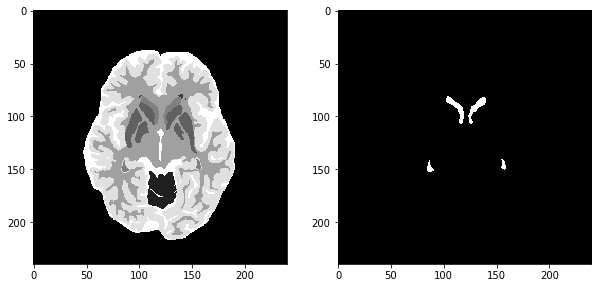

In [8]:
GT = plt.imread('../data/dataset_brains/1_1_gt.tif')
gtMask = GT == 4
fig = plt.figure(figsize=(10,10))
ax1  = fig.add_subplot(121)
ax1.imshow(GT)
ax2  = fig.add_subplot(122)
ax2.imshow(gtMask)

### QUESTION:
Look at the ventricle masks for different subjects and different slices. Based on the shapes that you see, what difficulties do you think you might face, if you wanted to train an active shape model? How could you modify the dataset to overcome these difficulties?